## Seaborn 

In [27]:
import warnings
warnings.filterwarnings('ignore')

##### Importamos la librería:

In [28]:
import seaborn as sns

##### Importamos el dataset:

In [29]:
tips = sns.load_dataset('tips')

Para empezar, veremos los diferentes estilos con los que cuenta la librería _Seaborn_. Hay cinco estilos básicos:
- Dark
- Darkgrid
- White
- White Grid 
- Ticks

Y se utilizan como veremos a continuación:

In [30]:
sns.set_style('dark')
sns.set_style('darkgrid')
sns.set_style('ticks')
sns.set_style('white')
sns.set_style('whitegrid') #Al haberlos usado todos, seaborn se quedará con el último definido (Whitegrid)

#### Una variable numérica

Si queremos representar una variable numérica, podemos usar distplot y sus distintos parámetros:

Text(0.5, 1.0, 'Tip Amount Distribution')

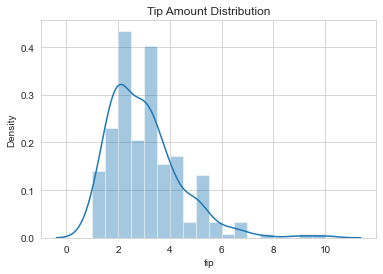

In [31]:
g = sns.distplot(tips.tip)
g.set_title('Tip Amount Distribution')


Si añadiéramos antes del gráfico uno de los estilos definidos previamente, veremos cómo cambia el gráfico final:

Text(0.5, 1.0, 'Tip Amount Distribution')

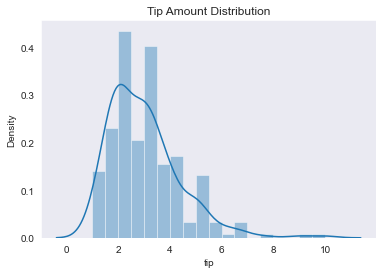

In [32]:
sns.set_style('dark')
g = sns.distplot(tips.tip)
g.set_title('Tip Amount Distribution')

Si usamos los distintos parámetros veremos cómo modificar nuestro gráfico según convenga:

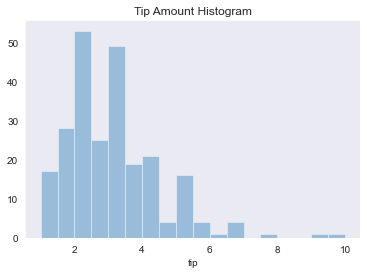

In [33]:
g = sns.distplot(tips.tip,kde=False)
g.set_title('Tip Amount Histogram');

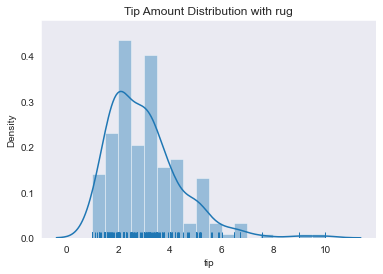

In [34]:
g = sns.distplot(tips.tip,rug=True)
g.set_title('Tip Amount Distribution with rug');

#### Una variable categórica

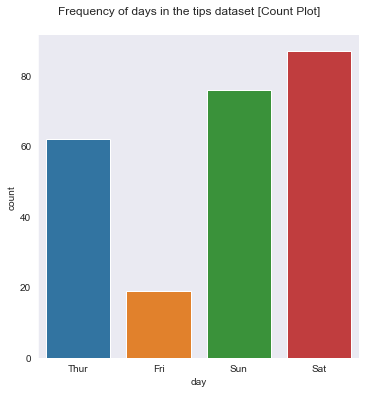

In [35]:
g = sns.catplot(x="day",kind='count',order=['Thur','Fri','Sun','Sat'],data=tips);
g.fig.suptitle("Frequency of days in the tips dataset [Count Plot]",y=1.05);

#### Dos variables numéricas

Hasta ahora, solo se ha representado una variable (numérica o categórica), pero... ¿Podemos representar más de una?¿Cómo?

Uno de los aspectos a estudiar cuando tenemos más de una variable, es buscar la realción entre las mismas. Por ello es interesante utilizar gráficos de dispersión que nos muestren dicho vínculo:

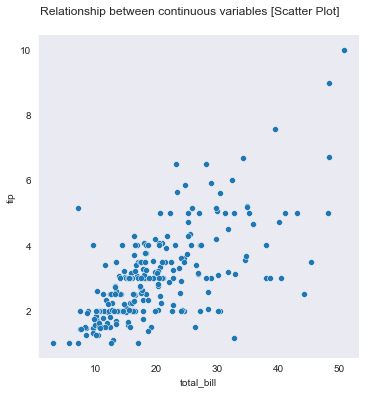

In [36]:
g = sns.relplot(x="total_bill",y="tip",data=tips,kind='scatter');
g.fig.suptitle('Relationship between continuous variables [Scatter Plot]',y=1.05);

Seaborn también es muy útil en estos casos para mostrarnos la densidad en el gráfico mediante el añadido de un histograma al gráfico de dispersión:

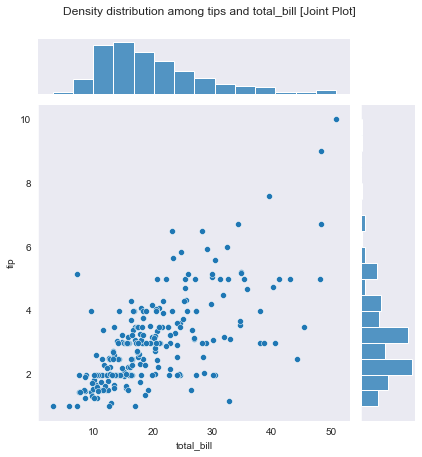

In [37]:
g = sns.jointplot(x="total_bill",y='tip',data=tips,kind='scatter');
g.fig.suptitle('Density distribution among tips and total_bill [Joint Plot]',y=1.05);

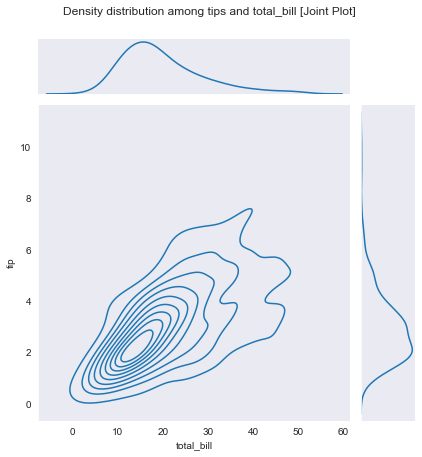

In [38]:
g = sns.jointplot(x="total_bill",y='tip',data=tips,kind='kde');
g.fig.suptitle('Density distribution among tips and total_bill [Joint Plot]',y=1.05);

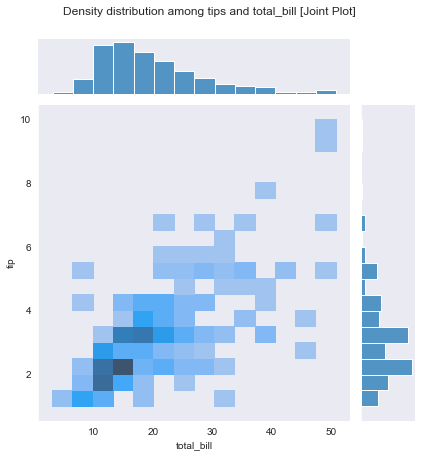

In [39]:
g = sns.jointplot(x="total_bill",y='tip',data=tips,kind='hist');
g.fig.suptitle('Density distribution among tips and total_bill [Joint Plot]',y=1.05);

Otro elemento muy importante en la visualización de relaciones de variables es la línea de tendencia:

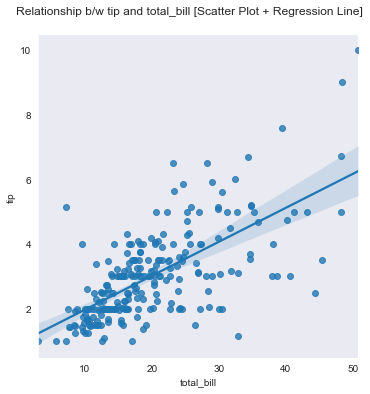

In [40]:
g = sns.lmplot(x="total_bill",y="tip",data=tips);
g.fig.suptitle('Relationship b/w tip and total_bill [Scatter Plot + Regression Line]',y=1.05);

Si la variable independiente es de tipo fecha y/o hora, podemos hacer un gráfico lineal, que también es un gráfico de series temporales:

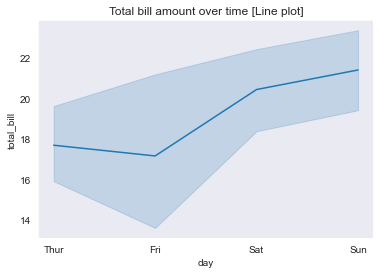

In [41]:
g = sns.lineplot(x="day",y="total_bill",data=tips);
g.set_title('Total bill amount over time [Line plot]');

#### Dos variables numéricas y una categórica

También podría darse el caso en el cual obtuviéramos dos variables numéricas y una categórica. Para esta situación, seaborn tiene la siguiente solución:

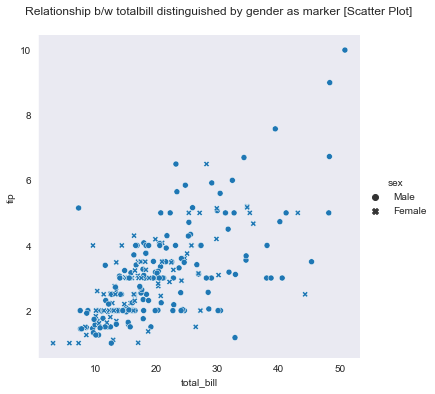

In [42]:
g = sns.relplot(x="total_bill",y="tip",style='sex',kind='scatter',data=tips)
g.fig.suptitle('Relationship b/w totalbill distinguished by gender as marker [Scatter Plot]',y=1.05);

Si preferimos algo más visual, se puede optar por los colores:

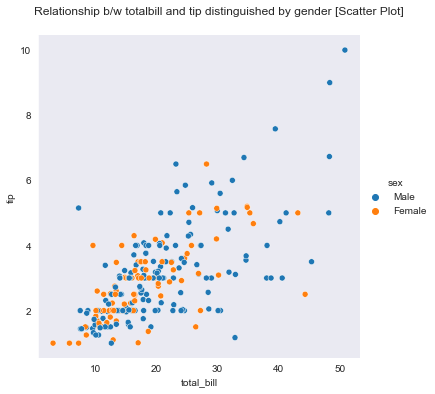

In [43]:
g = sns.relplot(x="total_bill",y="tip",hue='sex',kind='scatter',data=tips);
g.fig.suptitle('Relationship b/w totalbill and tip distinguished by gender [Scatter Plot]',y=1.05);

Alternativamente, podemos usar cada valor de la variable categórica como un grupo para trazar la relación entre dos variables numéricas para cada valor de la variable categórica:

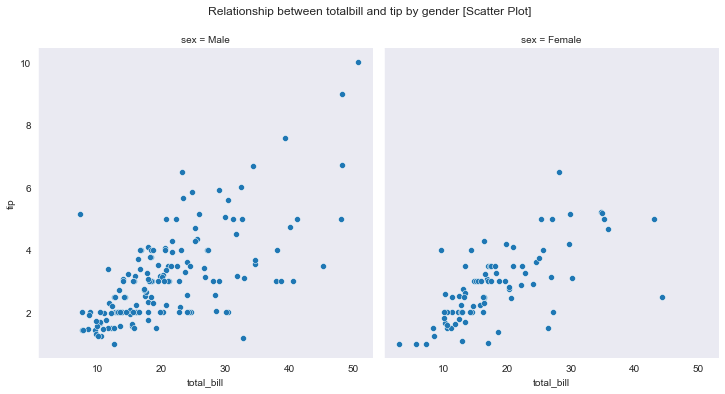

In [44]:
g = sns.relplot(x="total_bill",y="tip",col='sex',kind='scatter',data=tips);
g.fig.suptitle('Relationship between totalbill and tip by gender [Scatter Plot]',y=1.05);

#### Tres variables numéricas

Si tenemos tres variables numéricas, podemos hacer un gráfico de dispersión para dos variables y la tercera variable puede ser usada como el tamaño de los puntos en el gráfico de dispersión.

In [45]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

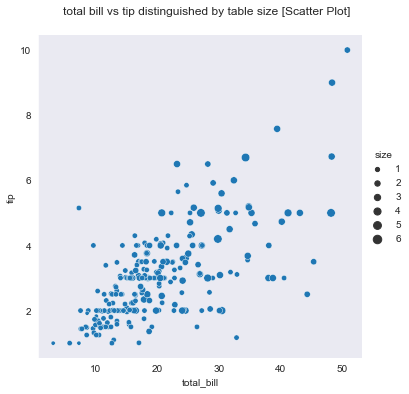

In [46]:
table_size=[0,2,4,6]
g = sns.relplot(x="total_bill",y="tip",size="size",kind='scatter',data=tips);
g.fig.suptitle('total bill vs tip distinguished by table size [Scatter Plot]',y=1.05);

#### Tres variables numéricas y una categórica

Si tenemos tres variables numéricas y una categórica, se puede trazar la misma gráfica mencionada en la sección anterior para cada valor de la variable categórica.

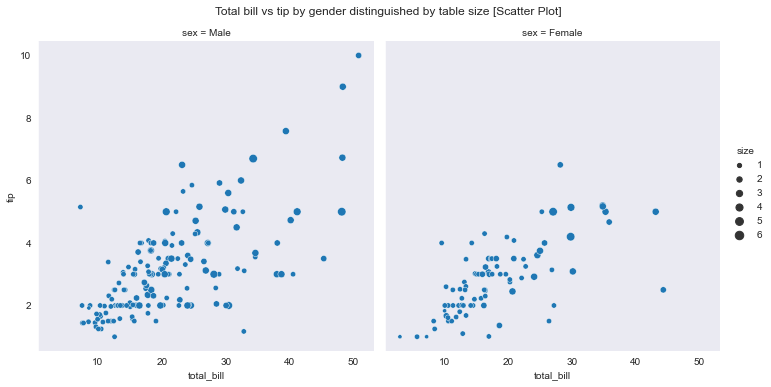

In [47]:
g = sns.relplot(x="total_bill",y="tip",col='sex',size='size',kind='scatter',data=tips);
g.fig.suptitle('Total bill vs tip by gender distinguished by table size [Scatter Plot]',y=1.03);

#### Una variable numérica y otra categórica

Este es probablemente el gráfico más básico, común y útil en la visualización de datos. Si tenemos una variable numérica y una variable categórica, podemos hacer varios gráficos como el de barras y el de tiras.

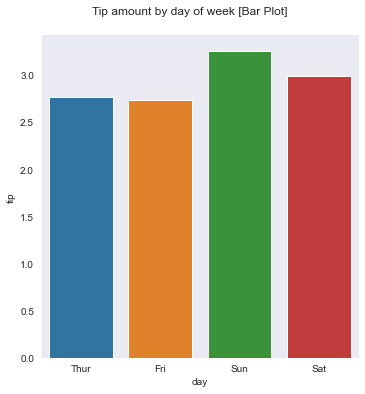

In [48]:
g = sns.catplot(x="day",y="tip",kind='bar',order=['Thur','Fri','Sun','Sat'],ci=False,data=tips);
g.fig.suptitle('Tip amount by day of week [Bar Plot]',y=1.05);

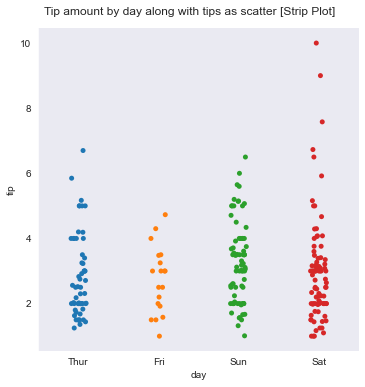

In [49]:
g = sns.catplot(x="day",y="tip",kind='strip',order=['Thur','Fri','Sun','Sat'],ci=False,data=tips);
g.fig.suptitle('Tip amount by day along with tips as scatter [Strip Plot]',y=1.03);

¿Y si queremos tener en cuenta la distribución?

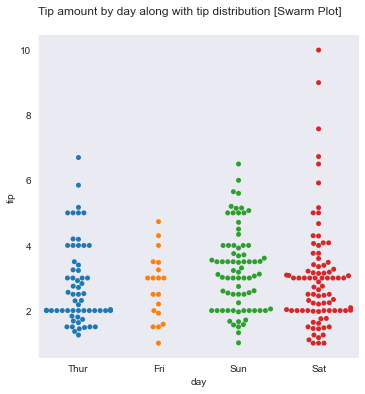

In [50]:
g = sns.catplot(x="day",y="tip",kind='swarm',order=['Thur','Fri','Sun','Sat'],ci=False,data=tips);
g.fig.suptitle('Tip amount by day along with tip distribution [Swarm Plot]',y=1.05);

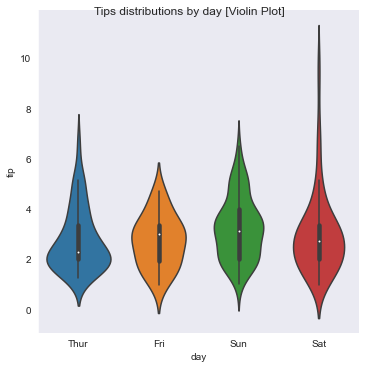

In [51]:
g = sns.catplot(x="day",y="tip",kind='violin',order=['Thur','Fri','Sun','Sat'],data=tips);
g.fig.suptitle('Tips distributions by day [Violin Plot]');

También podemos visualizar el rango intercuartílico (del percentil 25 al 75) de la variable contínua dentro de cada valor de la variable categórica usando un diagrama de puntos:

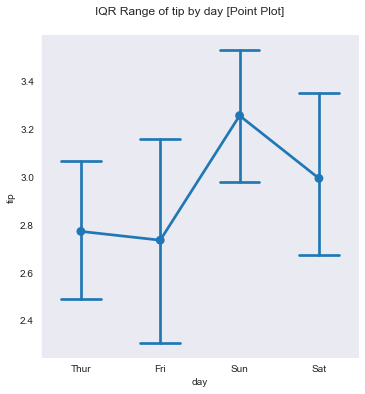

In [52]:
g = sns.catplot(x="day",y="tip",kind='point',order=['Thur','Fri','Sun','Sat'],data=tips,capsize=0.5);
g.fig.suptitle('IQR Range of tip by day [Point Plot]',y=1.05);

#### Una variable numérica y dos categóricas

Con una variable numérica y dos variables categóricas, podemos utilizar todos los gráficos mencionados en la sección anterior y dar cabida a la tercera variable categórica adicional, ya sea como una variable de columna o como un subgrupo en cada subgráfico, como se muestra a continuación:

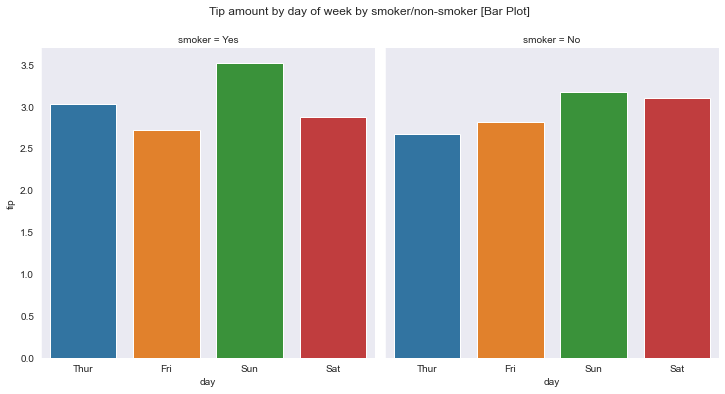

In [53]:
g = sns.catplot(x="day",y="tip",kind='bar',col='smoker',order=['Thur','Fri','Sun','Sat'],ci=False,data=tips);
g.fig.suptitle('Tip amount by day of week by smoker/non-smoker [Bar Plot]',y=1.05);

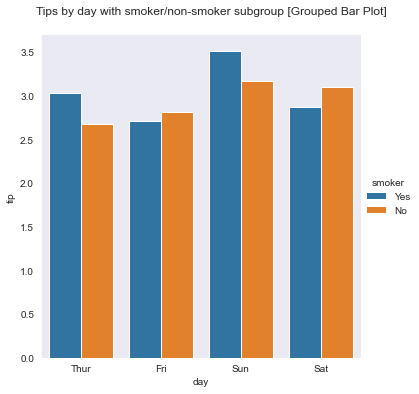

In [54]:
g = sns.catplot(x="day",y="tip",kind='bar',hue='smoker',order=['Thur','Fri','Sun','Sat'],ci=False,data=tips);
g.fig.suptitle('Tips by day with smoker/non-smoker subgroup [Grouped Bar Plot]',y=1.05);

#### Una variable numérica y tres categóricas

Con una numérica y tres categóricas, podemos hacer todas las visualizaciones mencionadas en la sección de una variable categórica y una numérica y ajustar dos variables categóricas adicionales con una variable como variable de columna/fila de la figura y otra como un subgrupo en cada subgráfico.

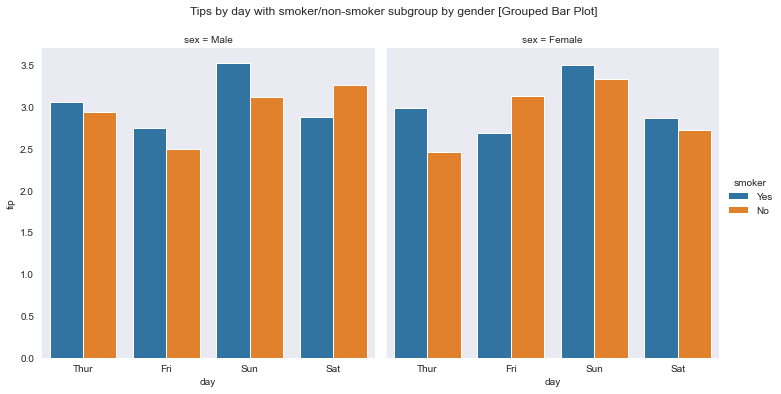

In [55]:
g = sns.catplot(x="day",y="tip",kind='bar',hue='smoker',col='sex',order=['Thur','Fri','Sun','Sat'],ci=False,data=tips);
g.fig.suptitle('Tips by day with smoker/non-smoker subgroup by gender [Grouped Bar Plot]',y=1.05);


#### Más de tres variables contínuas

Finalmente, si tenemos más de tres variables numéricas, podemos usar el mapa de calor. Con este tipo de gráficos, visualizamos la relación entre cada una de las variables numéricas en un solo objeto.

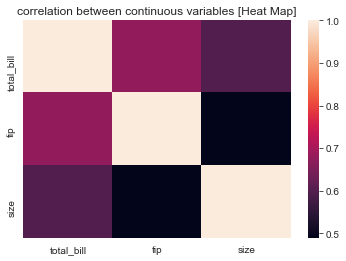

In [56]:
g = sns.heatmap(tips.corr());
g.set_title('correlation between continuous variables [Heat Map]');

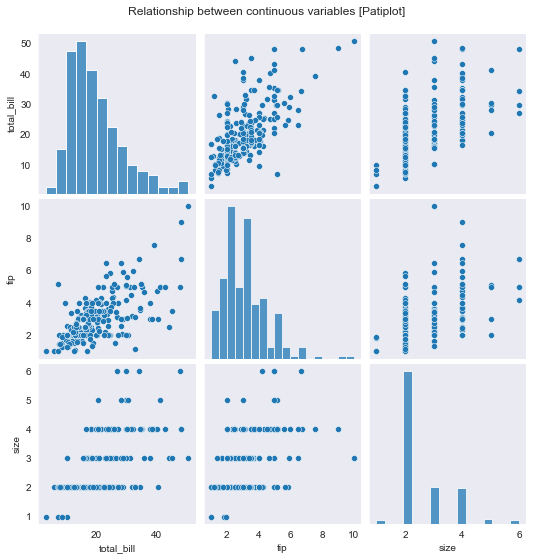

In [57]:
g = sns.pairplot(tips);
g.fig.suptitle('Relationship between continuous variables [Patiplot]',y=1.03);

#### Definición de títulos, ejes y leyendas:

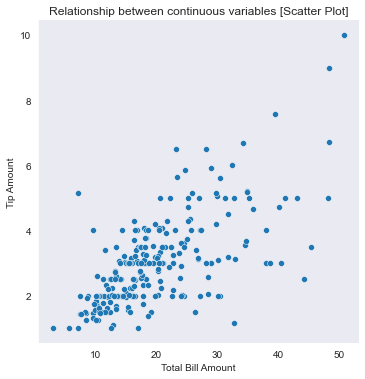

In [58]:
g = sns.relplot(x="total_bill",y="tip",data=tips,kind='scatter');
g.axes[0,0].set_title('Relationship between continuous variables [Scatter Plot]');
g.axes[0,0].set_xlabel('Total Bill Amount');
g.axes[0,0].set_ylabel('Tip Amount');

Text(0, 0.5, 'probability')

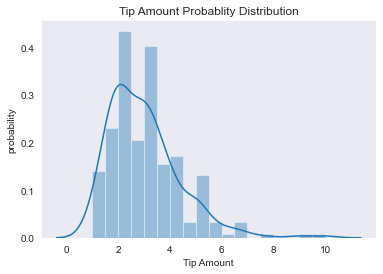

In [59]:
g = sns.distplot(tips.tip)
g.set_title('Tip Amount Probablity Distribution');
g.set_xlabel('Tip Amount')
g.set_ylabel('probability')

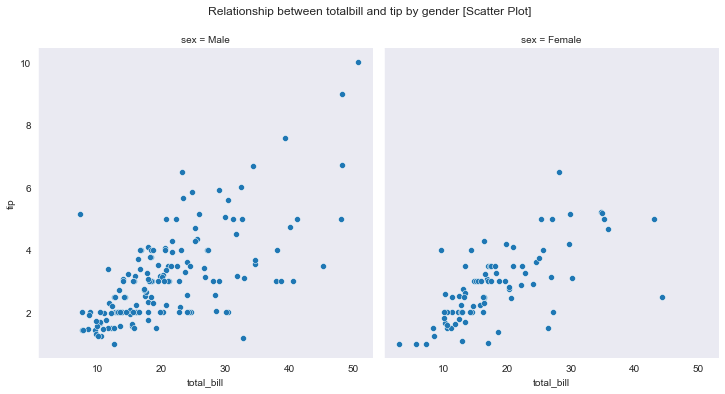

In [60]:
g = sns.relplot(x="total_bill",y="tip",col='sex',kind='scatter',data=tips);
g.fig.suptitle('Relationship between totalbill and tip by gender [Scatter Plot]',y=1.05);